# Pilotage par la durée de vie en retraite

## Modèle de durée de vie en retraite

On propose d'introduire un pilotage par la durée de vie en retraite $R_{EV}$ :

$$
R_{EVs} = \frac{ 60 + E - A_s }{ 60 + E }
$$

où 

$$
E = E_V \left\{ \textrm{arrondi}(\textrm{année}+1/2-A_s)  \right\}
$$

On choisit d'imposer $A_s$ tel que $R_{EV}$ est donné. En pratique, nous allons choisir de conserver le même niveau de durée de vie en retraite qu'aujourd'hui. 

La difficulté est que le lien entre $R_{EV}$ et $A_s$ n'est pas facile à inverser car $E$ dépend de $A_s$ à travers une table. L'inversion ne peut donc être que numérique.



## Calcul de la durée de vie en retraite en 2020

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
import pylab as pl
import scipy.optimize as spo
import numpy as np
from copy import deepcopy

In [2]:
simulateur = SimulateurRetraites()
analyse = simulateur.pilotageCOR()

In [3]:
scenario_central = 3
annee = 2020

In [4]:
analyse.A[scenario_central][annee]

62.165131135

In [5]:
REV = analyse.REV[scenario_central][annee]
REV

0.2904910180336402

En 2020, l'âge de départ en retraite du COR est égal à 62.16 ans et la durée de vie en retraite est égale à 0.2905. En d'autres termes, la proportion de la vie passée à la retraite est égale à 29.05% de la vie totale.

## Calcul de la durée de vie en retraite en 2070

In [6]:
scenario_central = 3
annee = 2070

In [7]:
analyse.A[scenario_central][annee]

63.913405939

In [8]:
REV = analyse.REV[scenario_central][annee]
REV

0.3224587178843781

En 2070, l'âge de départ à la retraite du COR est 63.91 ans et la durée de vie en retraite est égale à 0.3225. En d'autres termes, la proportion de la vie passée à la retraite est égale à 32.25% de la vie totale.

On observe que la durée de vie en retraite est un peu supérieure en 2070 par rapport à 2020. C'est pourquoi on peut se questionner sur la possibilité de maintenir ce ratio constant par rapport à 2020. 

Toutefois, la durée de vie en retraite est associée à une déterioration progressive de la santée, jusqu'à la mort. C'est pourquoi on mesure l'espérance de vie en bonne santé. 

## Inversion de l'âge de départ en fonction de la durée de vie en retraite

Calculons la durée de vie en retraite en fonction de l'âge de départ en retraite en 2070. 

In [9]:
nombreAges = 20
table_As = np.linspace(62.0, 69.0, nombreAges)
s = 1
dictREV = dict()
for annee in simulateur.annees_standard:
    dictREV[annee] = []
for i in range(nombreAges):
    analyse = simulateur.pilotageParPensionAgeCotisations(Acible = table_As[i])
    for annee in simulateur.annees_standard:
        dictREV[annee].append(analyse.REV[s][annee])

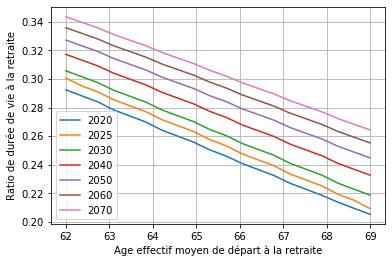

In [10]:
for annee in simulateur.annees_standard:
    pl.plot(table_As, dictREV[annee], label = "%d" % (annee));
pl.legend();
pl.xlabel("Age effectif moyen de départ à la retraite")
pl.ylabel("Ratio de durée de vie à la retraite");
pl.grid()

En 2020, si l'âge de départ moyen est égal à 65 ans, alors le ratio entre la durée de vie en retraite et la durée de toute la vie est égal à 0.26. On observe que, pour une année donnée, lorsque l'âge de départ à la retraite augmente, alors la durée de vie en retraite diminue. 

En 2070, l'âge qui permet de maintenir une durée de vie en retraite proche du niveau actuel (0.2904 en 2020) est proche de 66 ans. 

## Pilotage à solde nul, pension au niveau actuel et durée de vie en retraite actuel

In [11]:
Pcible = simulateur.P[1][2020]
Pcible

0.502137798

In [12]:
analyseCOR = simulateur.pilotageCOR()
s = 1
REVcible = analyseCOR.REV[s][2020]
REVcible

0.2904910180336402

In [13]:
Acible = simulateur.calculeAge(REVcible = REVcible)
analyse = simulateur.pilotageParSoldePensionAge(Scible=0.0, Pcible=Pcible, Acible = Acible)

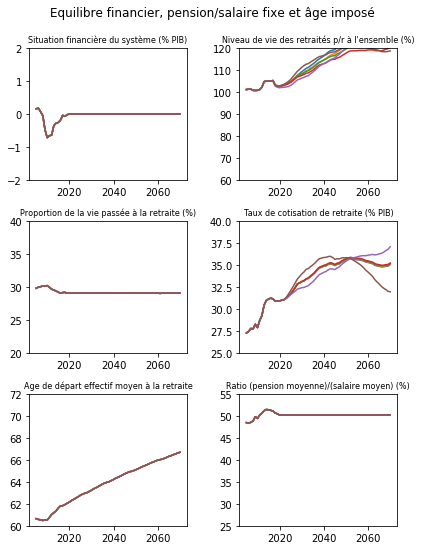

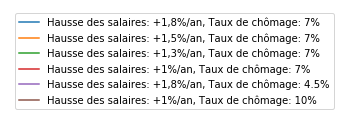

In [14]:
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier, pension/salaire fixe et âge imposé',fontsize=12)
analyse.dessineSimulation()
analyse.dessineLegende()

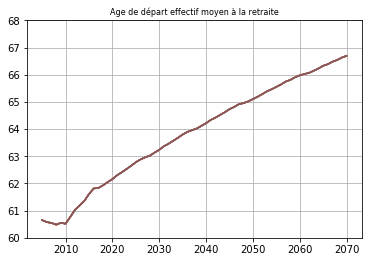

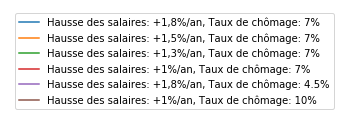

In [15]:
analyse.graphique("A")
pl.ylim(top = 68.0);
pl.grid()
analyse.dessineLegende()

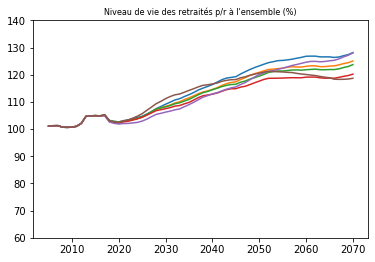

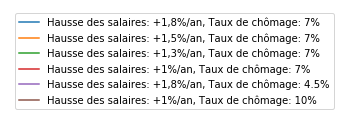

In [16]:
analyse.graphique("RNV")
pl.ylim(top = 140.0);
analyse.dessineLegende()

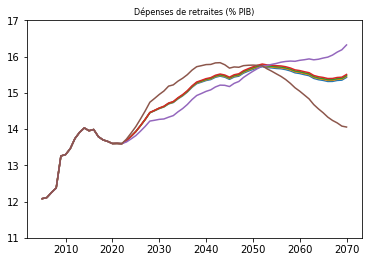

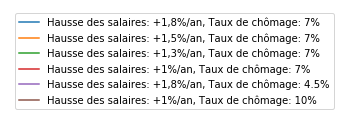

In [17]:
analyse.graphique("Depenses")
pl.ylim(top = 17.0)
analyse.dessineLegende()

## Limitation de l'âge à 65 ans

In [18]:
A_limite = 65.0
As = deepcopy(analyse.A)
for s in simulateur.scenarios:
    for a in simulateur.annees:
        As[s][a] = min(As[s][a], A_limite)

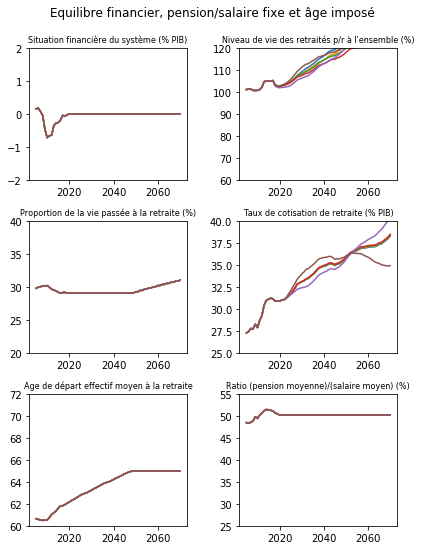

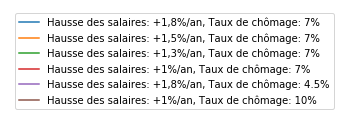

In [19]:
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier, pension/salaire fixe et âge imposé',fontsize=12)
analyse = simulateur.pilotageParSoldePensionAge(Scible=0.0, Pcible=Pcible, Acible = As)
analyse.dessineSimulation()
analyse.dessineLegende()

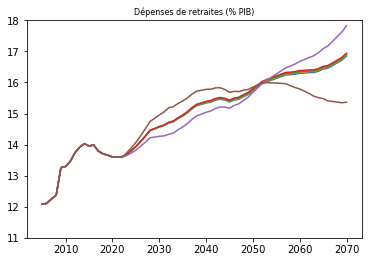

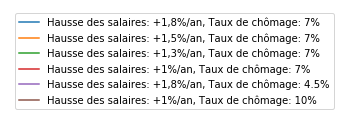

In [20]:
analyse.graphique("Depenses")
pl.ylim(top = 18.0)
analyse.dessineLegende()